#### Import Library

In [1]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

#### Read data into a DataFrame

In [2]:
cdata=pd.read_csv(r"C:\Users\Priyanka Sawant\PGAML&DAClass\ML Project\ShopeCustomer\Customers.csv")

#### Preprocessing Data

In [3]:
#print first 5 records of data 
cdata.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
#print the dimensions of the dataframe 
cdata.shape

(2000, 8)

In [5]:
#Exploring the columns
cdata.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

##### Feature Selection

In [6]:
#Arrange Order of columns & store in 'new_order' variable.
new_order = ['CustomerID', 'Gender', 'Age',
        'Profession', 'Work Experience',
       'Family Size','Annual Income ($)','Spending Score (1-100)']


In [7]:
#Sorting the order of variables
cdata = cdata.reindex(columns=new_order)
cdata.head()

,CustomerID,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100)
0,1,Male,19,Healthcare,1,4,15000,39
1,2,Male,21,Engineer,3,3,35000,81
2,3,Female,20,Engineer,1,1,86000,6
3,4,Female,23,Lawyer,0,2,59000,77
4,5,Female,31,Entertainment,2,6,38000,40


In [8]:
#drop CustomerID & store all in 'cdata'

cdata=cdata.drop("CustomerID",axis=1)
cdata.head()

,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100)
0,Male,19,Healthcare,1,4,15000,39
1,Male,21,Engineer,3,3,35000,81
2,Female,20,Engineer,1,1,86000,6
3,Female,23,Lawyer,0,2,59000,77
4,Female,31,Entertainment,2,6,38000,40


In [9]:
#print the dimensions of the dataframe 
cdata.shape

(2000, 7)

#### We notice that 1 variable is dropped i.e. "CustomerID"

In [10]:
#finding the missing values
cdata.isnull().sum()

Gender                     0
Age                        0
Profession                35
Work Experience            0
Family Size                0
Annual Income ($)          0
Spending Score (1-100)     0
dtype: int64

#### We Observe that there is missing values in the data.

In [11]:
#Finding the unique values 
for i in cdata.columns:
    print({i:cdata[i].unique()})
  

{'Gender': array(['Male', 'Female'], dtype=object)}
{'Age': array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41,
       16, 76, 62, 80,  1,  0, 86, 79, 83, 95, 93, 78, 15,  6, 84,  4, 91,
       14, 92, 77, 89, 12,  7, 94, 96, 74, 85, 73,  9, 10, 11, 17, 90, 61,
       13, 72,  5, 75, 99, 88, 82,  8, 87,  3, 97, 81, 98,  2, 71],
      dtype=int64)}
{'Profession': array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)}
{'Work Experience': array([ 1,  3,  0,  2,  4,  9, 12, 13,  5,  8, 14,  7,  6, 10, 11, 15, 16,
       17], dtype=int64)}
{'Family Size': array([4, 3, 1, 2, 6, 5, 8, 7, 9], dtype=int64)}
{'Annual Income ($)': array([ 15000,  35000,  86000, ...,  90961, 182109, 110610], dtype=int64)}
{'Spending Score (1-100)': array

In [12]:
#replace the missing values with mode values to handle the missig values

for value in ['Profession']:
    cdata['Profession'] = cdata['Profession'].fillna('Unidentified')
  

In [13]:
#check missing values 
cdata.isnull().sum()

Gender                    0
Age                       0
Profession                0
Work Experience           0
Family Size               0
Annual Income ($)         0
Spending Score (1-100)    0
dtype: int64

#### We can see that dataset doesn't contain any missing values

In [14]:
# descriptive statistics for each column in the DataFrame
cdata.describe(include="all")

,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100)
count,2000,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.000000
unique,2,NaN,10,NaN,NaN,NaN,NaN
top,Female,NaN,Artist,NaN,NaN,NaN,NaN
freq,1186,NaN,612,NaN,NaN,NaN,NaN
mean,NaN,48.960000,NaN,4.102500,3.768500,110731.821500,50.962500
std,NaN,28.429747,NaN,3.922204,1.970749,45739.536688,27.934661
min,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000
25%,NaN,25.000000,NaN,1.000000,2.000000,74572.000000,28.000000
50%,NaN,48.000000,NaN,3.000000,4.000000,110045.000000,50.000000
75%,NaN,73.000000,NaN,7.000000,5.000000,149092.750000,75.000000


In [15]:
#check for duplicate records

cdata.duplicated().sum()

0

#### We can see that dataset doesn't contain any duplicate values

In [16]:
# display a summary of the DataFrame
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  2000 non-null   object
 1   Age                     2000 non-null   int64 
 2   Profession              2000 non-null   object
 3   Work Experience         2000 non-null   int64 
 4   Family Size             2000 non-null   int64 
 5   Annual Income ($)       2000 non-null   int64 
 6   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 109.5+ KB


In [17]:
#Check how many unique labels in "Profession" column

cdata["Profession"].nunique()

10

In [18]:
#Count the records of "Profession" variable in 'cdata' dataframe.

cdata["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Unidentified      35
Name: Profession, dtype: int64

#### Exploring columns

In [19]:
cdata.columns

Index(['Gender', 'Age', 'Profession', 'Work Experience', 'Family Size',
       'Annual Income ($)', 'Spending Score (1-100)'],
      dtype='object')

## EDA

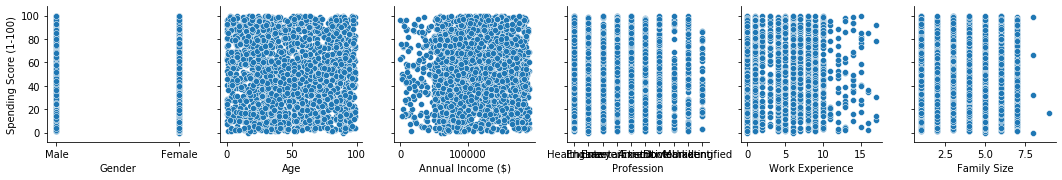

In [20]:
#.Pair plot graph  

sns.pairplot(cdata,x_vars=['Gender', 'Age', 'Annual Income ($)', 'Profession',
       'Work Experience', 'Family Size'],y_vars='Spending Score (1-100)',kind='scatter')  


                             Age  Work Experience  Family Size  \
Age                     1.000000        -0.014319     0.038254   
Work Experience        -0.014319         1.000000     0.011873   
Family Size             0.038254         0.011873     1.000000   
Annual Income ($)       0.021378         0.089136     0.093005   
Spending Score (1-100) -0.041798        -0.028948     0.002232   

                        Annual Income ($)  Spending Score (1-100)  
Age                              0.021378               -0.041798  
Work Experience                  0.089136               -0.028948  
Family Size                      0.093005                0.002232  
Annual Income ($)                1.000000                0.023299  
Spending Score (1-100)           0.023299                1.000000  


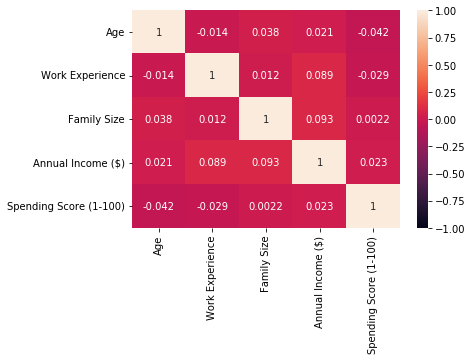

In [21]:
#checking correlation with heatmap plot

corr_df=cdata.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)



#### From our heat map we can see that there is no significant correlation between any of the numeric attributes.

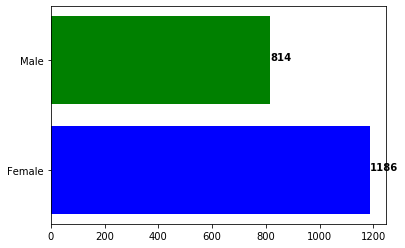

In [22]:
#Number of MALE and FEMALE Workers
#sns.countplot(x=cdata["Gender"])
ax=cdata["Gender"].value_counts()
plt.barh(y=ax.index,width=ax.values,color=["blue","green"])


for i, v in enumerate(ax.values):
    plt.text(v + 1, i, str(v), color='black', fontweight='bold')
# plt.show()


#### We observe that Male- 814 & Female- 1186

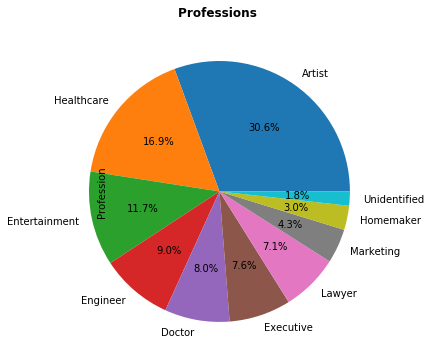

In [23]:
#Professions Pie chart

Profession = cdata['Profession'].value_counts()
plt.title('Professions \n\n\n\n', weight='bold')
Profession.plot.pie(autopct="%.1f%%", radius=1.5)
plt.show()

#### We can see that Artist Profession count is highest amongst all.

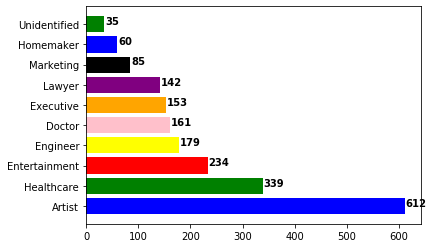

In [24]:
#Professional bar chart
plt.barh(y=Profession.index, width=Profession.values, color=['blue', 'green', 'red', 
                                                             'yellow', 'pink', 'orange', 'purple', 'black']);
for i, v in enumerate(Profession.values):
    plt.text(v + 1, i, str(v), color="black", fontweight='bold')
plt.show()

#### From above barh graph we observe that how many count of members there are in each profession and highest amongst all is "Artist".

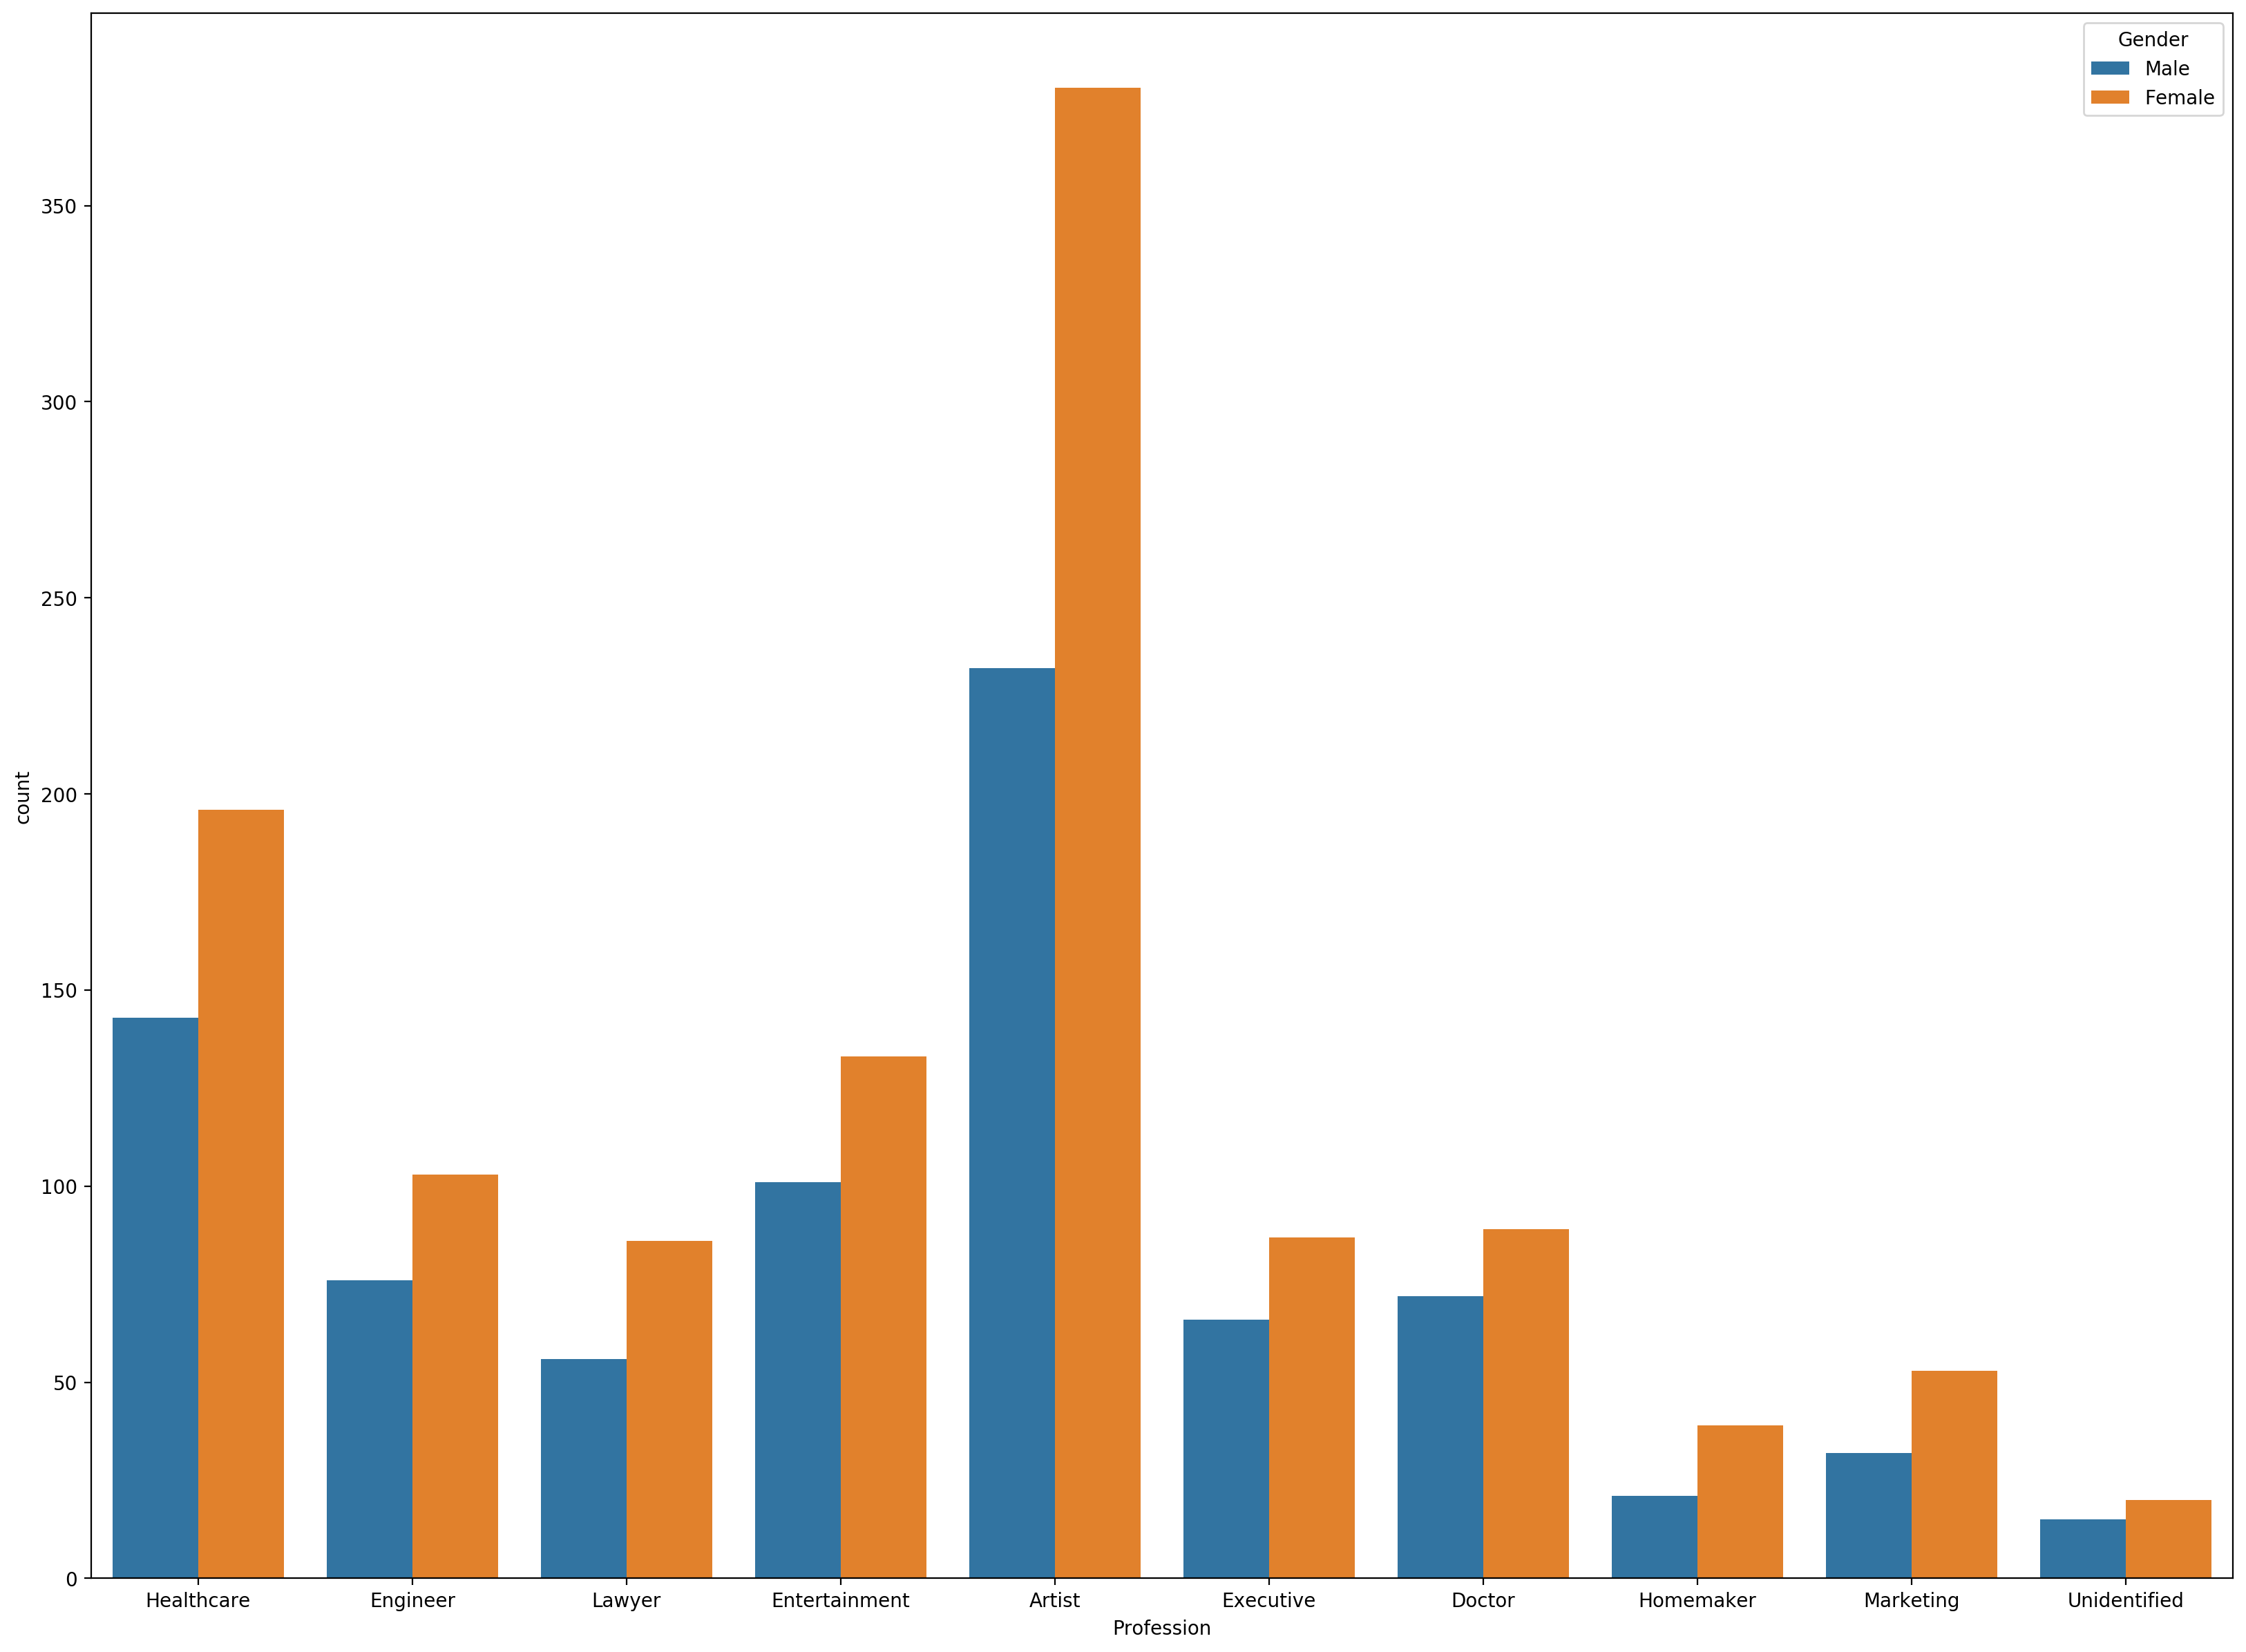

In [25]:
#Notebook jalota. below
#Number of Male and Female Gender based on the Profession
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data = cdata,x="Profession",hue="Gender")   #x= variable to plot on the x-axis &  hue=variable to use for coloring the bars

#### From above we can see that no of female are highest in all working profession than male..

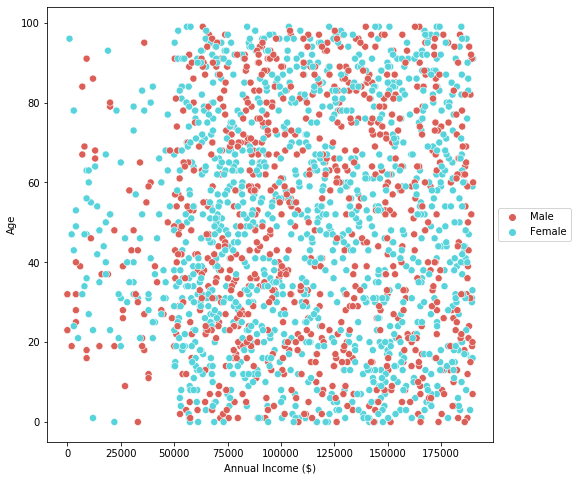

"\n\nThis code seems to be plotting a scatterplot using the Seaborn library in Python.\n\nHere is a breakdown of the code:\n\nsns: an alias for the Seaborn library\nscatterplot(): a function in Seaborn used for creating a scatterplot\ndata=cdata: the data used for the scatterplot, in this case, it is a DataFrame called cdata\nx='Annual Income ($)': the column in df used for the x-axis\ny='Age': the column in df used for the y-axis\nhue='Gender': the column in df used for color coding the data points based on gender\npalette='hls': the color palette used for coloring the data points\ns=50: the size of the data points in the scatterplot\nOverall, this code is plotting a scatterplot to visualize the relationship between annual income and age, with color-coded data points based on gender.\n\n"

In [26]:
#Scatter plot 

plt.figure(figsize=(8,8))
sns.scatterplot(data=cdata,x='Annual Income ($)',y='Age',hue='Gender',palette='hls',s=50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

"""

This code seems to be plotting a scatterplot using the Seaborn library in Python.

Here is a breakdown of the code:

sns: an alias for the Seaborn library
scatterplot(): a function in Seaborn used for creating a scatterplot
data=cdata: the data used for the scatterplot, in this case, it is a DataFrame called cdata
x='Annual Income ($)': the column in df used for the x-axis
y='Age': the column in df used for the y-axis
hue='Gender': the column in df used for color coding the data points based on gender
palette='hls': the color palette used for coloring the data points
s=50: the size of the data points in the scatterplot
Overall, this code is plotting a scatterplot to visualize the relationship between annual income and age, with color-coded data points based on gender.

"""

###### From our scatterplot it can be said that there is no significant relation between Age and Income. Also the distribution is similiar for both the genders.

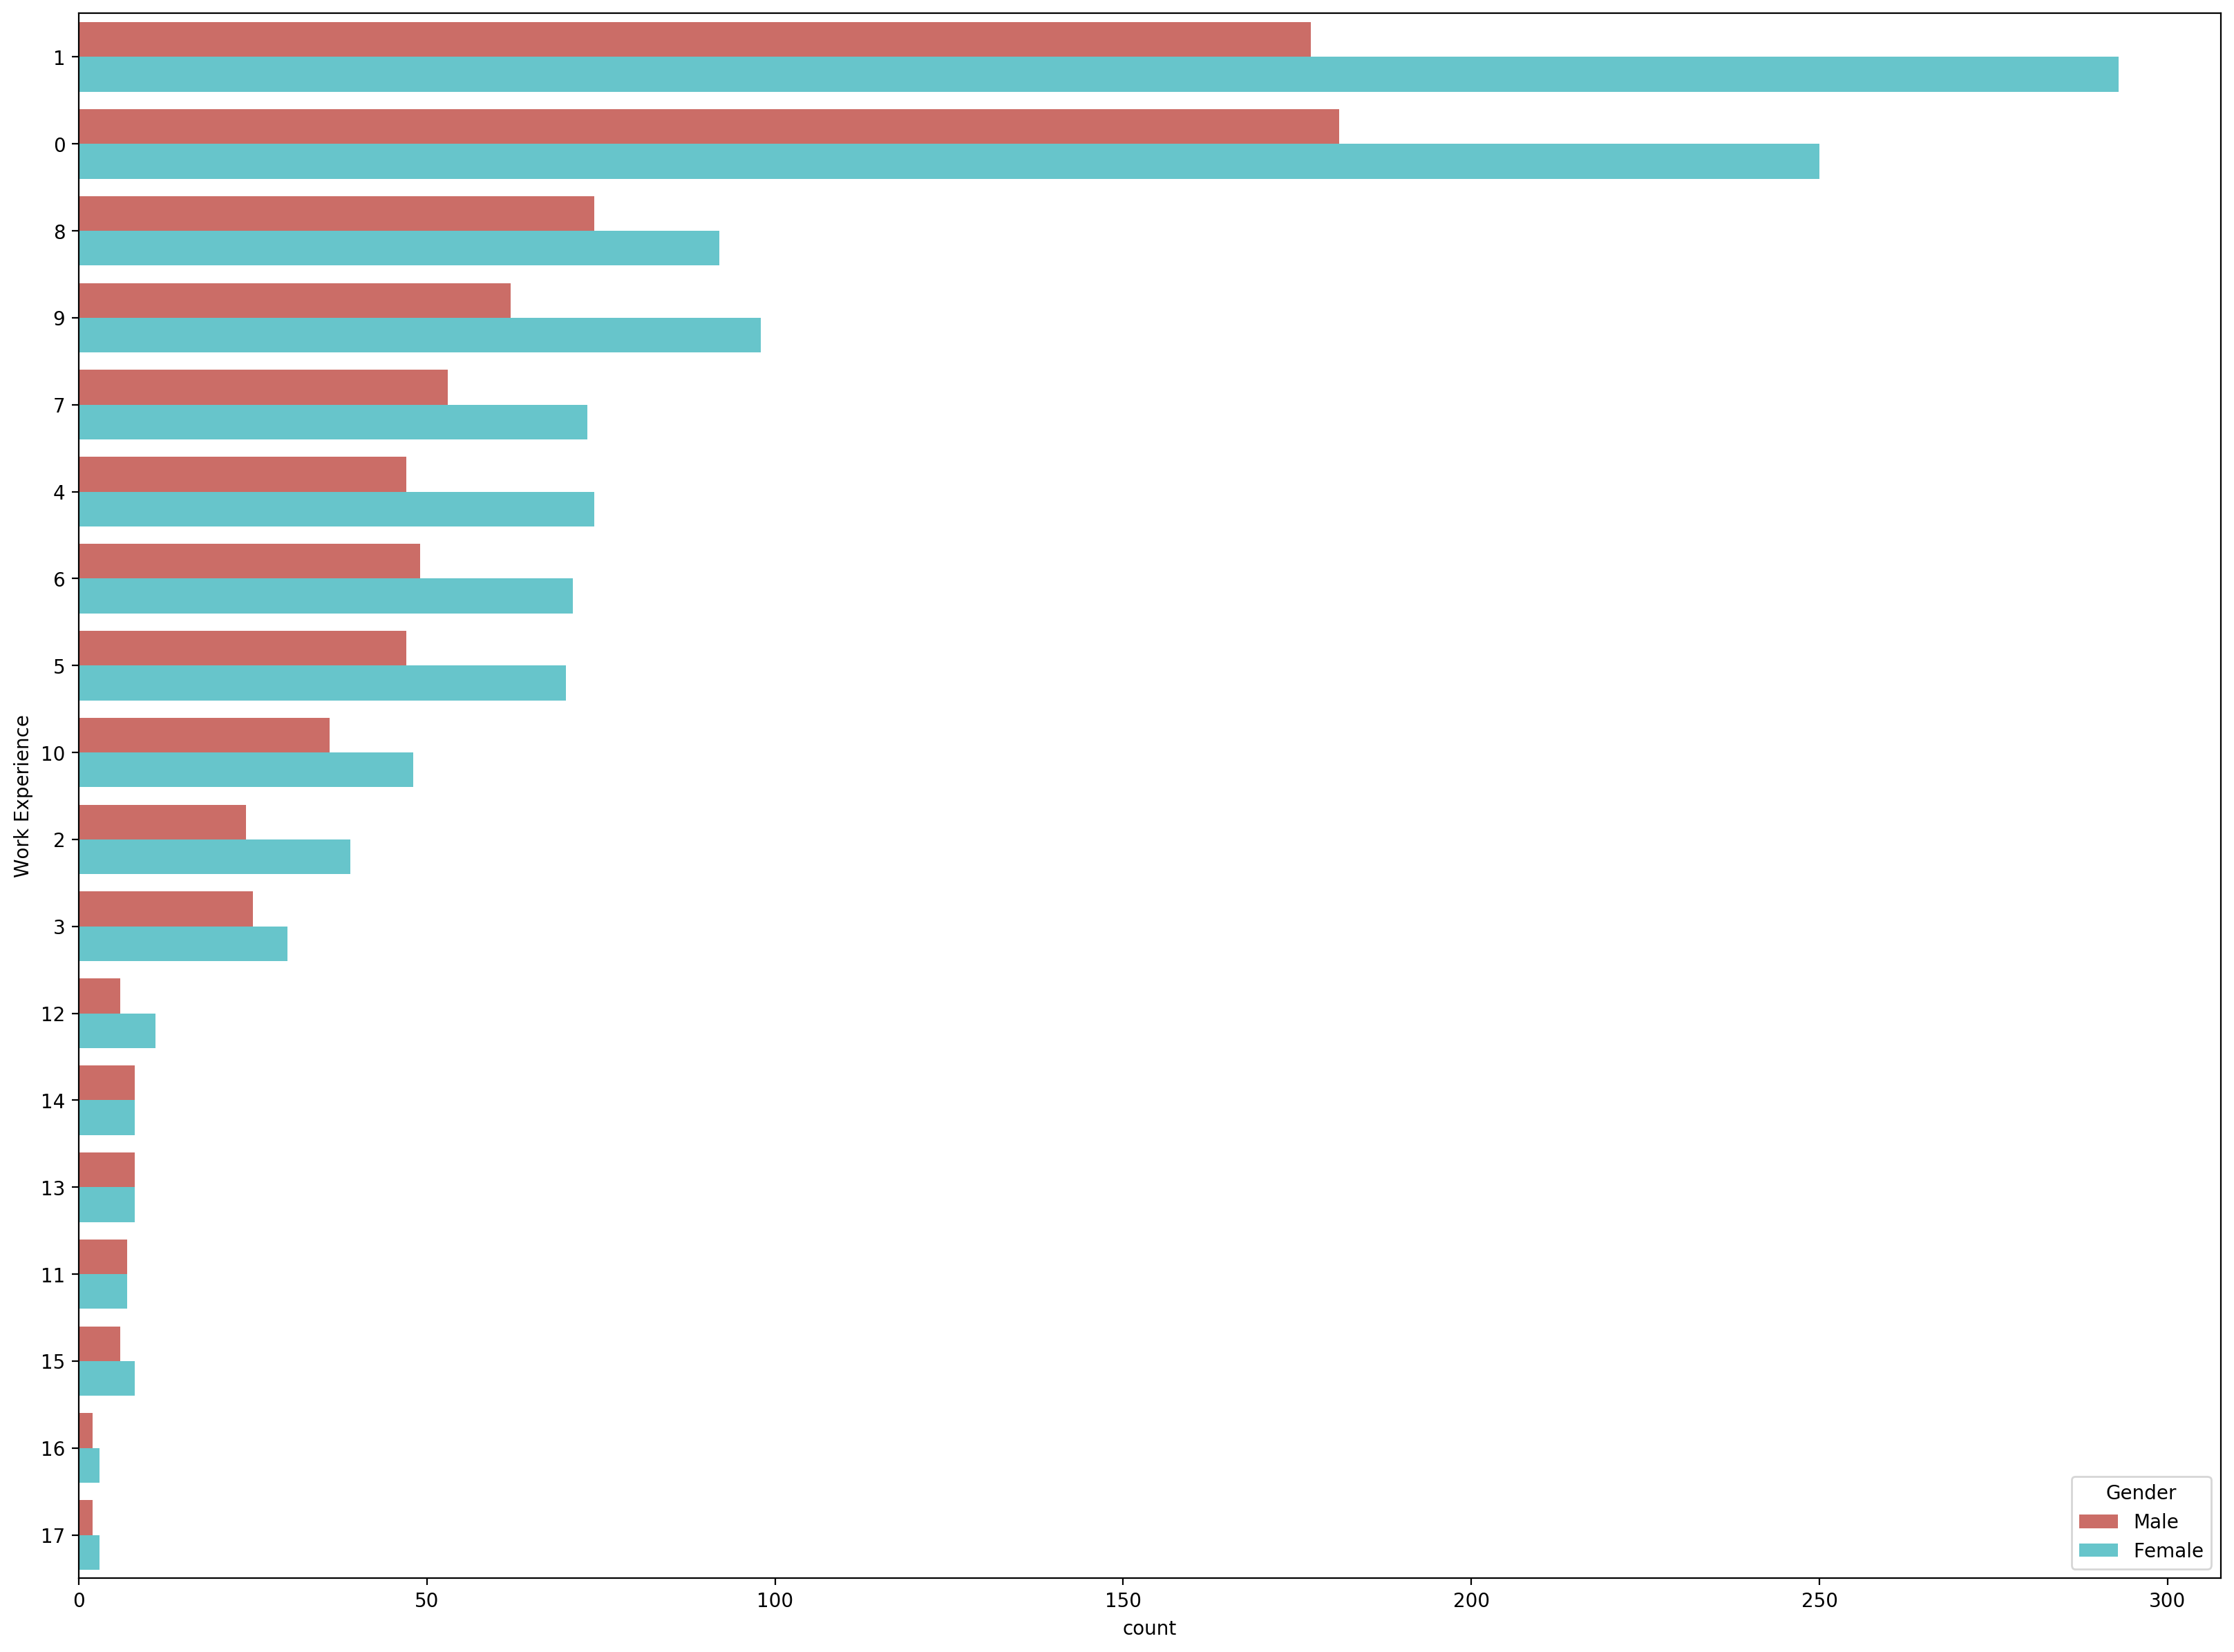

In [27]:
#Workexp for each gender

plt.figure(figsize=(20,15),dpi=200)
sns.countplot(data=cdata,y='Work Experience',palette='hls',order=cdata['Work Experience'].value_counts().index, hue='Gender')



#### Here number of females are more for work experience upto 12 years. After that we can say that the number of males and females is almost equal for higher work experience.

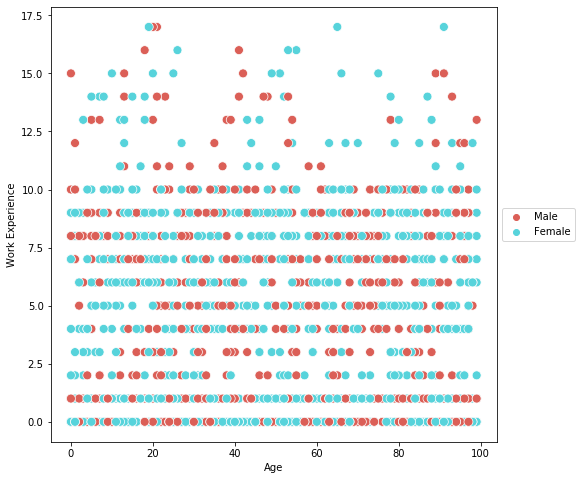

In [28]:
# Age Vs Wkexp

plt.figure(figsize=(8,8))
sns.scatterplot(data=cdata,x='Age',y='Work Experience',hue='Gender',palette='hls',s=80)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

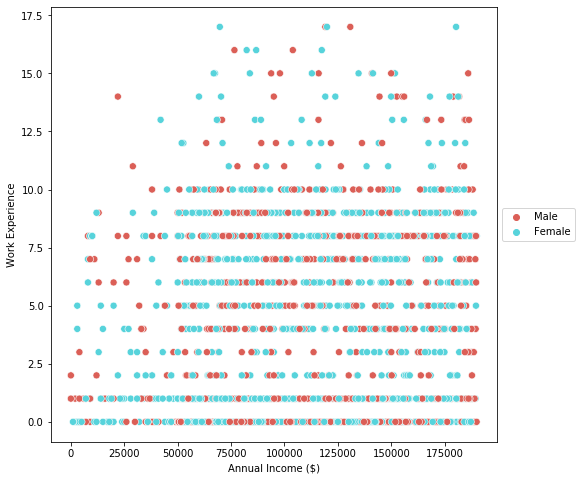

In [29]:
# Scater WrkEXP VS Annual Income($)
 
plt.figure(figsize=(8,8))
sns.scatterplot(data=cdata,x='Annual Income ($)',y='Work Experience',hue='Gender',palette='hls',s=50)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### From the above two scatter plot it can be said that the Age and Annual Income distribution does not have any specific relation with Work experience according to the dataset.

#### For almost every age every value of work experience is available and similarly fo annual income every value of work experience is there.

 

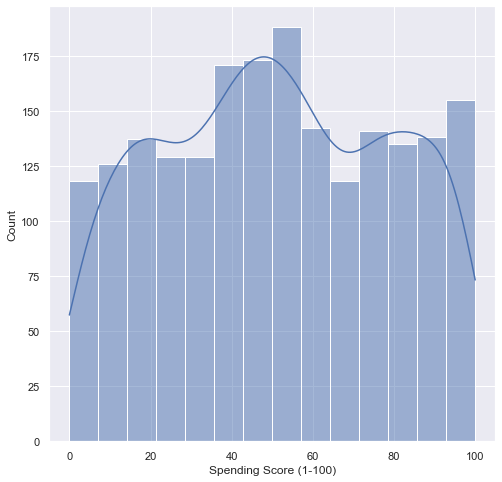

In [30]:
#spending_score ND

plt.figure(figsize=(8,8))
sns.set_theme()
sns.set_style('darkgrid')
sns.histplot(data=cdata,x='Spending Score (1-100)',palette='hls',kde=True)
plt.show()




#### The scores are not normally distributed

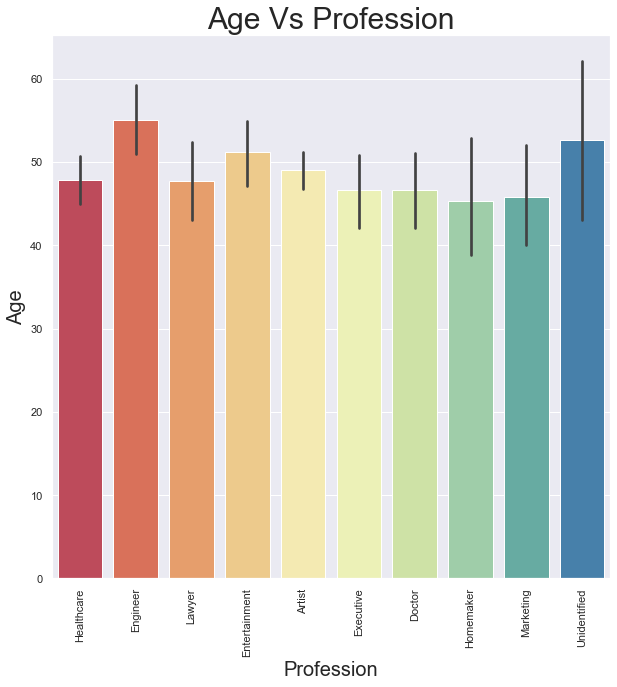

In [31]:
# Age vs profession

plt.figure(figsize=(10,10))
sns.barplot(x="Profession",y="Age",data=cdata,palette="Spectral")
plt.title("Age Vs Profession",fontsize=30)
plt.xlabel("Profession",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.xticks(rotation="vertical")
plt.show()

#### From Above ploting we observe that  the working profession are upto 40 yrs of age.

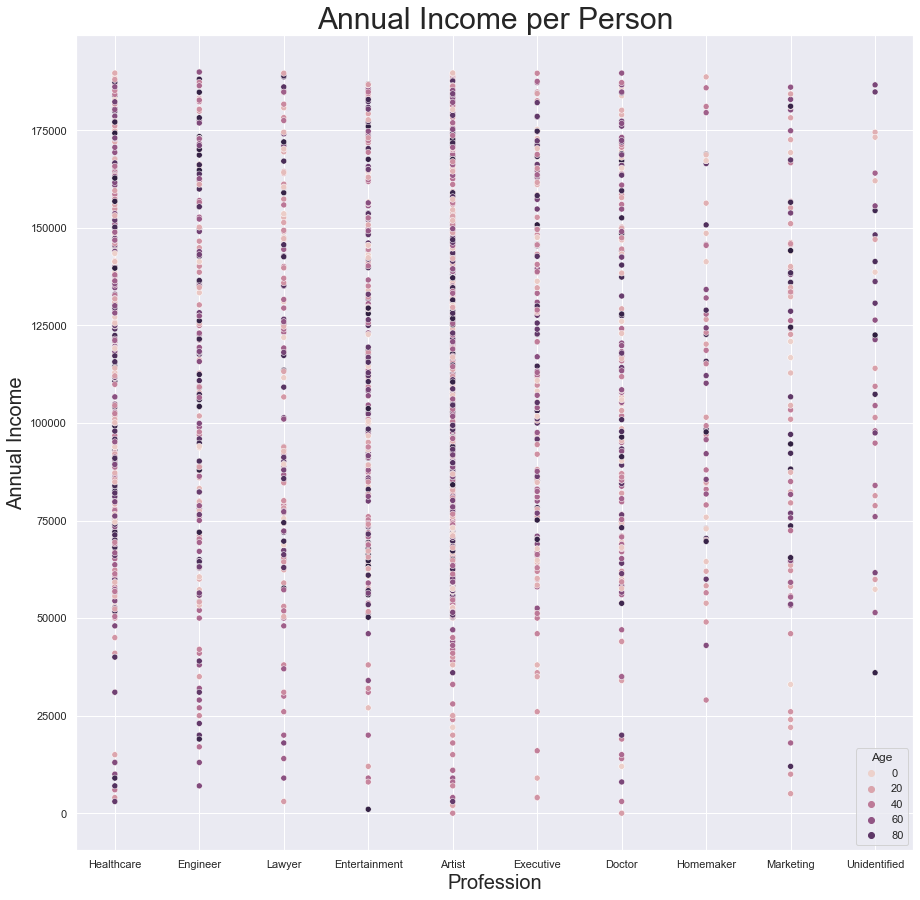

In [32]:
#ploting annual income vs profession

plt.figure(figsize=(15,15))
sns.scatterplot(x="Profession",y="Annual Income ($)",hue="Age",data=cdata)
plt.title("Annual Income per Person",fontsize=30)
plt.xlabel("Profession",fontsize=20)
plt.ylabel("Annual Income",fontsize=20)
plt.show()

#### Each profession has maximum income upto 175000 depending upon the profession

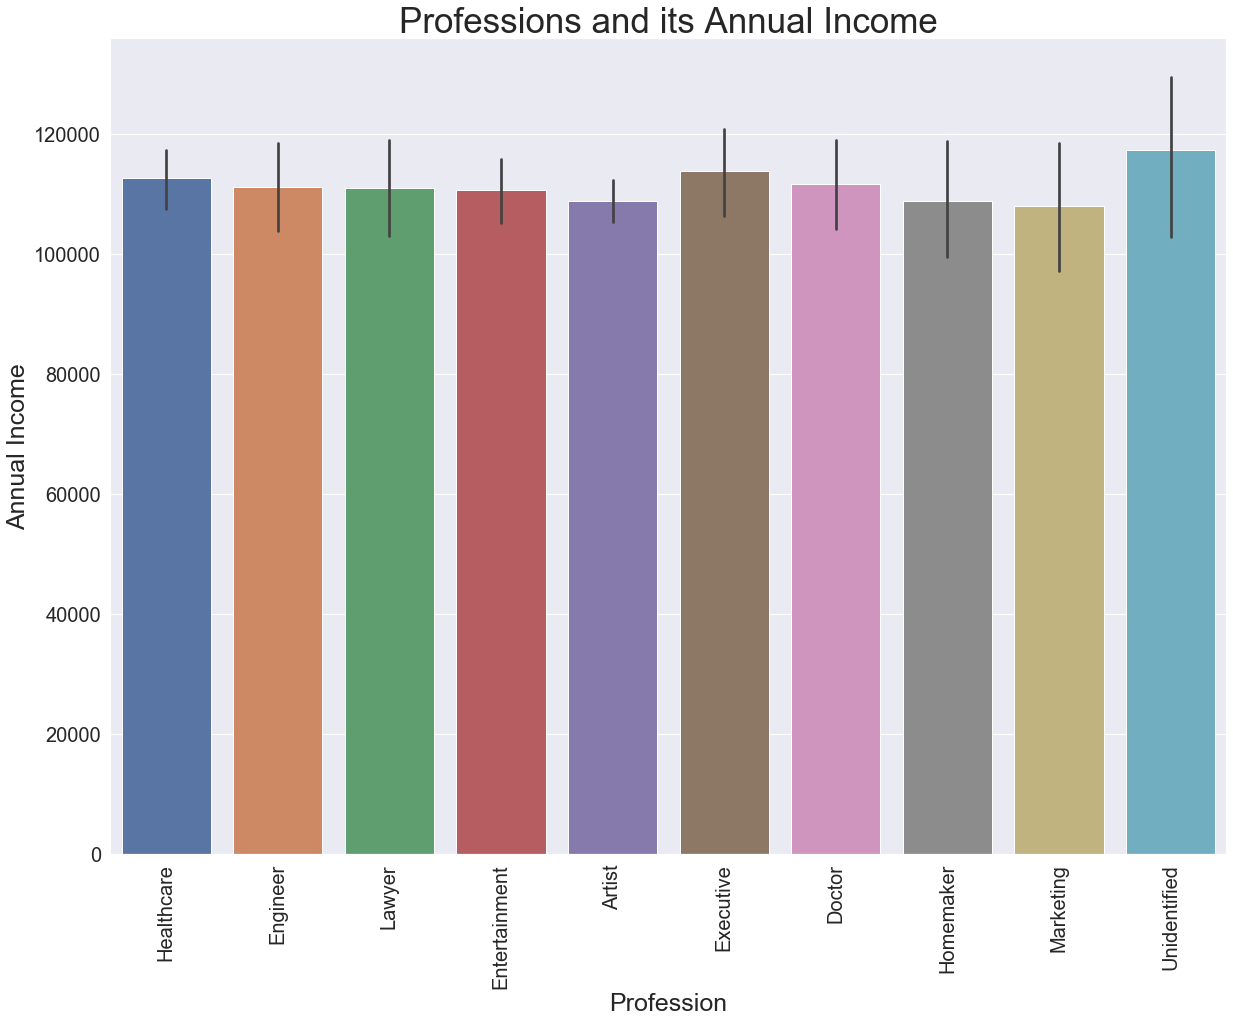

In [33]:
#Which Profession is getting high Annual Income ?
plt.figure(figsize=(20,15))
sns.barplot(x="Profession",y="Annual Income ($)",data=cdata)
plt.title("Professions and its Annual Income",fontsize=35)
plt.xlabel("Profession",fontsize=25)
plt.ylabel("Annual Income",fontsize=25)
plt.xticks(rotation="vertical",fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### We can observe that Executive Profession has the high Annual Income.

# Converting category to numerical by labelEncoder

In [34]:
cdata.head()

,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100)
0,Male,19,Healthcare,1,4,15000,39
1,Male,21,Engineer,3,3,35000,81
2,Female,20,Engineer,1,1,86000,6
3,Female,23,Lawyer,0,2,59000,77
4,Female,31,Entertainment,2,6,38000,40


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in cdata.columns:
    cdata[x]=le.fit_transform(cdata[x])


In [36]:
cdata.head()

,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100)
0,1,19,5,1,3,15,39
1,1,21,2,3,2,34,81
2,0,20,2,1,0,496,6
3,0,23,7,0,1,156,77
4,0,31,3,2,5,37,40


# Scaling & K Means Cluster

In [37]:
cdata.head()

,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100)
0,1,19,5,1,3,15,39
1,1,21,2,3,2,34,81
2,0,20,2,1,0,496,6
3,0,23,7,0,1,156,77
4,0,31,3,2,5,37,40


In [38]:
#Create x 
X=cdata.values[:,[5,-1]]
X

array([[  15,   39],
       [  34,   81],
       [ 496,    6],
       ...,
       [ 558,   14],
       [1679,    4],
       [ 796,   52]], dtype=int64)

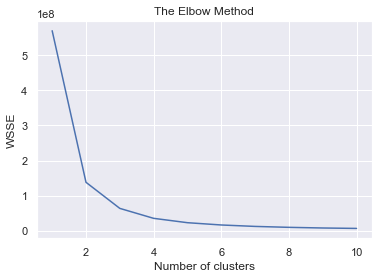

In [39]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
 
wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

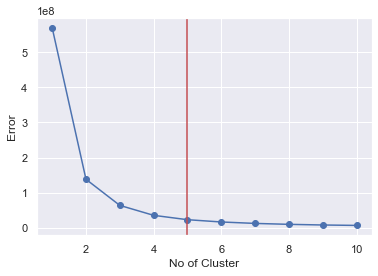

In [40]:
plt.plot(range(1,11),wsse, marker = 'o')
plt.xlabel('No of Cluster')
plt.ylabel('Error')
plt.axvline(5, c='r')
plt.show()

In [41]:
print(wsse)

[569868097.7375001, 138170302.54155627, 63855219.82223994, 35517684.359717995, 23100485.288282555, 16588121.00519974, 12503160.437056163, 9878921.25787292, 8010216.21831361, 6800776.513302815]


In [42]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=5, random_state = 10)
Y_pred = kmeans.fit_predict(X)


In [43]:
Y_pred

array([1, 1, 3, ..., 3, 0, 2])

In [44]:
kmeans.inertia_

23100485.28828255

In [45]:
kmeans.n_iter_

7

In [46]:
cdata["Clusters"]=Y_pred
cdata.head(10)

,Gender,Age,Profession,Work Experience,Family Size,Annual Income ($),Spending Score (1-100),Clusters
0,1,19,5,1,3,15,39,1
1,1,21,2,3,2,34,81,1
2,0,20,2,1,0,496,6,3
3,0,23,7,0,1,156,77,1
4,0,31,3,2,5,37,40,1
5,0,22,0,0,1,144,76,1
6,0,35,5,1,2,30,6,1
7,0,23,5,1,2,469,94,3
8,1,64,2,0,2,641,3,3
9,0,30,0,1,3,652,72,3


In [47]:
#Count the values of clusters
cdata["Clusters"].value_counts()

3    441
1    439
4    375
0    375
2    370
Name: Clusters, dtype: int64

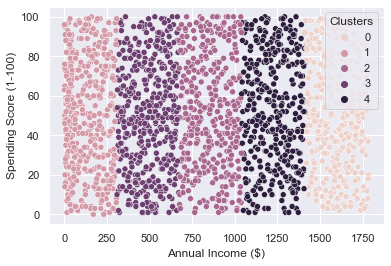

In [48]:
#ploting the clusters formed
sns.scatterplot(x="Annual Income ($)", y="Spending Score (1-100)",data=cdata,hue="Clusters")
